In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('titanic-Dataset.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

In [6]:
train.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


<Axes: >

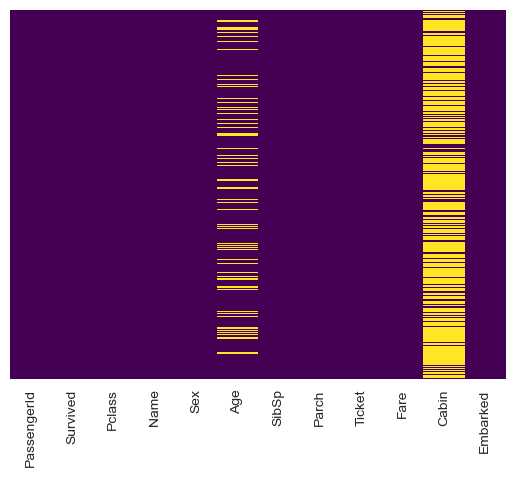

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

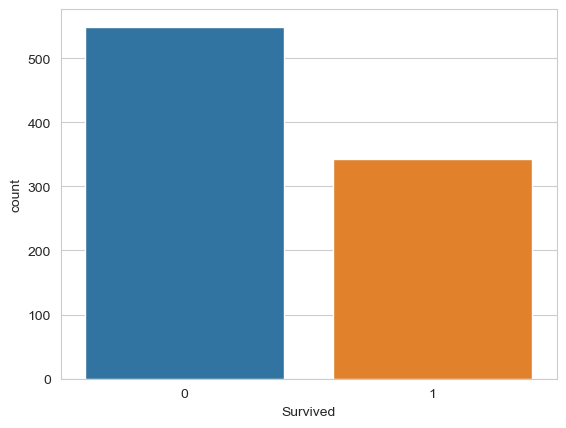

In [9]:
sns.countplot(x='Survived',data=train)

<Axes: xlabel='Survived', ylabel='count'>

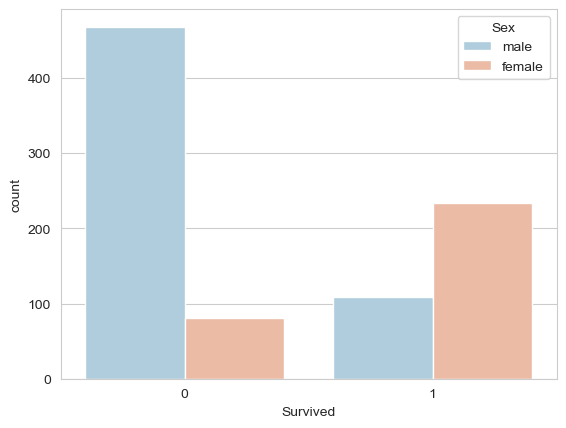

In [10]:
sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

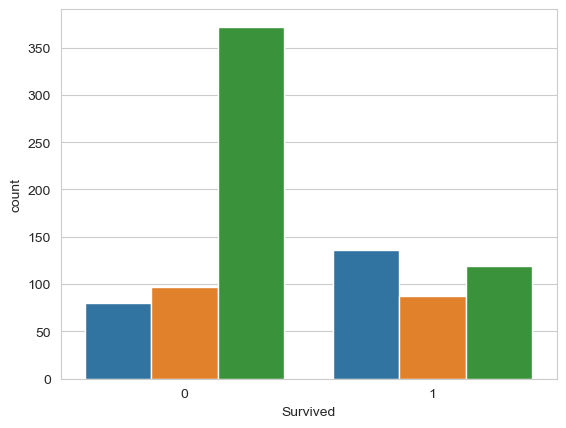

In [11]:
sns.countplot(x='Survived',data=train,hue='Pclass')

C:\Users\KELYN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

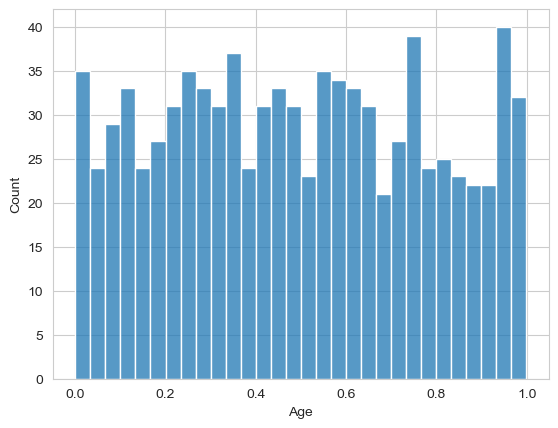

In [19]:
sns.histplot(train['Age'].dropna(),bins=30,kde=False)

<Axes: xlabel='SibSp', ylabel='count'>

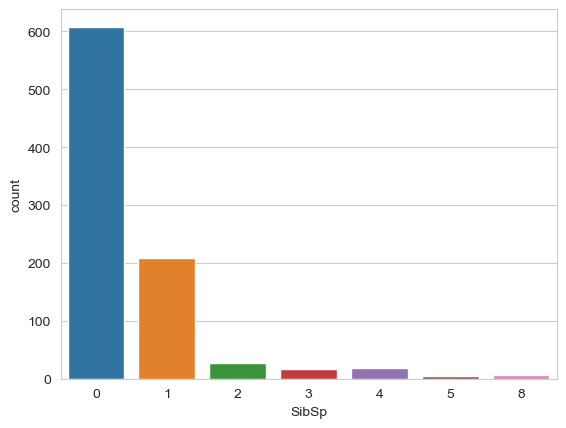

In [20]:
sns.countplot(x='SibSp',data=train)

<Axes: >

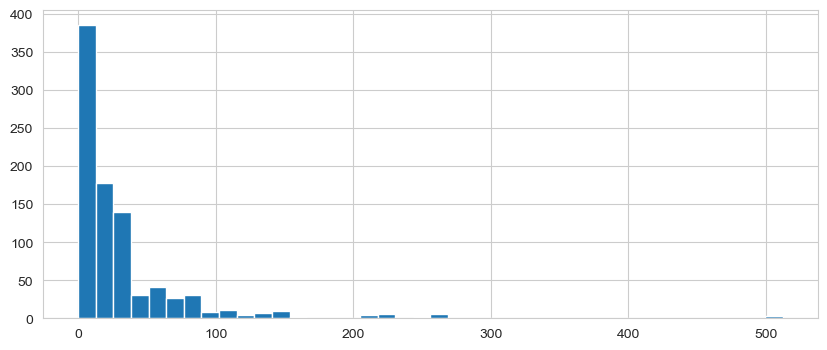

In [21]:
train['Fare'].hist(bins=40,figsize=(10,4))

<Axes: xlabel='Pclass', ylabel='Age'>

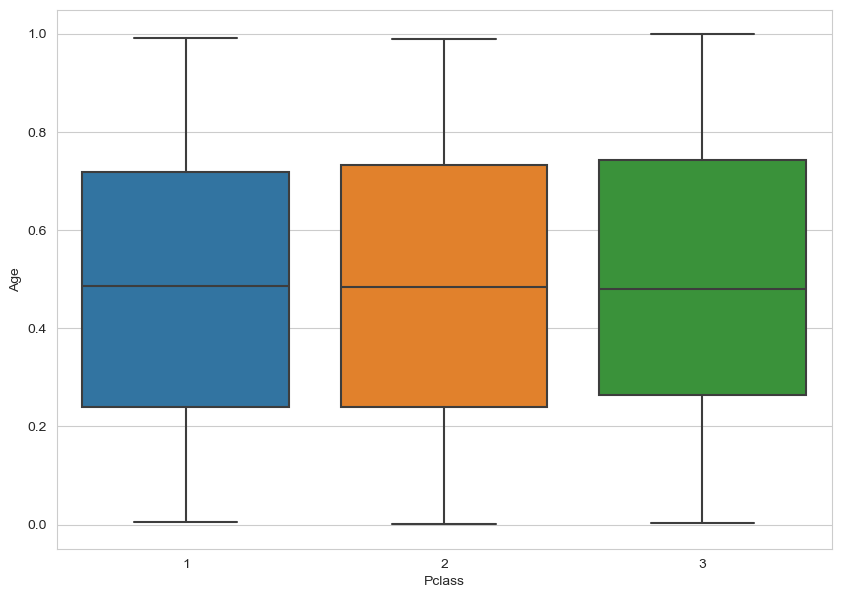

In [22]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [26]:
mean_class1 = train.groupby('Pclass')['Age'].mean().round().loc[1]
mean_class2 = train.groupby('Pclass')['Age'].mean().round().loc[2]
mean_class3 = train.groupby('Pclass')['Age'].mean().round().loc[3]
print(f'Mean age for Pclass 1: {mean_class1}')
print(f'Mean age for Pclass 2: {mean_class2}')
print(f'Mean age for Pclass 3: {mean_class3}')

Mean age for Pclass 1: 0.0
Mean age for Pclass 2: 0.0
Mean age for Pclass 3: 0.0


In [30]:
train.loc[train['Pclass']==1,'Age'] = train.loc[train['Pclass']==1,'Age'].fillna(value=mean_class1)
train.loc[train['Pclass']==2,'Age'] = train.loc[train['Pclass']==2,'Age'].fillna(value=mean_class2)
train.loc[train['Pclass']==3,'Age'] = train.loc[train['Pclass']==3,'Age'].fillna(value=mean_class3)

<Axes: >

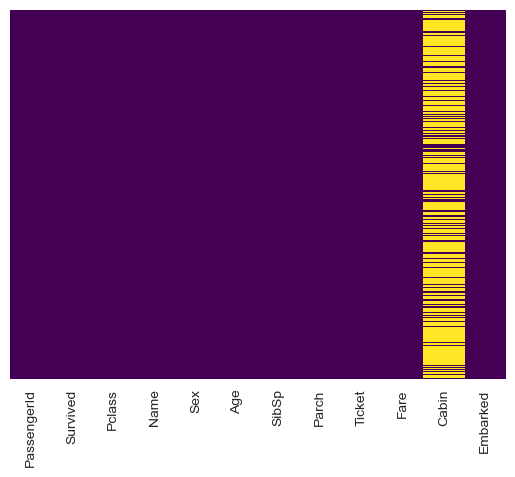

In [31]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [32]:
train.drop('Cabin',axis=1,inplace=True)

In [33]:
train.dropna(inplace=True) # dropping the 1 missing value in Embarked column

In [34]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [35]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [36]:
train = pd.concat([train,sex,embark],axis=1)

In [37]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,0.411714,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.442654,1,0,PC 17599,71.2833,C,False,False,False


In [38]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [39]:
train.drop('PassengerId',axis=1,inplace=True)

In [40]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,0.411714,1,0,7.2500,True,False,True
1,1,1,0.442654,1,0,71.2833,False,False,False
2,1,3,0.197971,0,0,7.9250,False,False,True
3,1,1,0.631801,1,0,53.1000,False,False,True
4,0,3,0.464096,0,0,8.0500,True,False,True


In [41]:
test = pd.read_csv('titanic-Dataset.csv')

In [42]:
test.loc[test['Pclass']==1,'Age'] = test.loc[test['Pclass']==1,'Age'].fillna(value=mean_class1)
test.loc[test['Pclass']==2,'Age'] = test.loc[test['Pclass']==2,'Age'].fillna(value=mean_class2)
test.loc[test['Pclass']==3,'Age'] = test.loc[test['Pclass']==3,'Age'].fillna(value=mean_class3)

<Axes: >

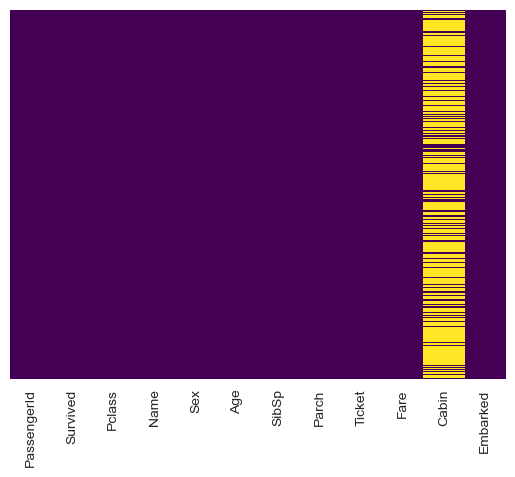

In [43]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [44]:
test.drop('Cabin',axis=1,inplace=True)

In [45]:
test.dropna(inplace=True)

In [46]:
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)

In [47]:

test = pd.concat([test,sex,embark],axis=1)

In [48]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [49]:
test.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


# Train and build Classifier

In [50]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [53]:
from sklearn.linear_model import LogisticRegression

In [55]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [56]:
logmodel.score(X_train,y_train)

0.792604501607717

In [57]:
logmodel.score(X_test,y_test)

0.8239700374531835